# Checking requisites

In [293]:
! pip install pandas numpy seaborn matplotlib scikit-learn imblearn xgboost


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Libraries

In [294]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer
from sklearn.impute import SimpleImputer
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import datetime
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV





In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Uploading data

In [296]:
client = pd.read_csv('./data/base_clientes.csv')
churn = pd.read_csv('./data/base_hist_churn.csv')
price = pd.read_csv('./data/base_precos.csv')

# Exploratory Data Analysis and Cleaning

## Initial descriptive analysis

In [297]:
client.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,NaN,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,NaN,...,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,NaN,...,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,NaN,...,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321


In [298]:
client.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,...,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,2.012000e+04,2.012000e+04,2.012000e+04,4385.000000,4385.000000,4385.000000,4385.000000,20120.000000,20120.000000,...,19970.000000,19970.000000,19970.000000,20120.000000,20105.000000,20105.000000,20120.00000,20102.000000,20120.000000,20116.000000
mean,NaN,1.949648e+05,3.196017e+04,1.953380e+04,344.466267,344.466267,3907.823737,214.150812,2370.826669,1912.253529,...,0.135960,0.052889,43.543557,196.822941,22.475752,21.353071,1.34826,217.304279,5.023658,20.578284
std,NaN,6.754792e+05,1.782284e+05,8.087283e+04,724.065119,724.065119,5700.747714,542.506310,4047.481373,5231.517730,...,0.026286,0.048587,5.173667,498.026444,23.853275,28.838847,1.45777,356.223220,1.678148,21.833836
min,NaN,-1.252760e+05,-4.275000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,-2.090000,-16689.260000,-85627.000000,...,0.000000,0.000000,-0.122184,-9038.210000,-528.640000,-981.560000,1.00000,-4148.990000,1.000000,0.000000
25%,NaN,5.832750e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1162.140000,0.000000,509.840000,0.000000,...,0.115237,0.000000,40.606701,0.000000,11.970000,11.950000,1.00000,51.542500,4.000000,12.500000
50%,NaN,1.533450e+04,0.000000e+00,9.060000e+02,162.600000,162.600000,2220.850000,40.830000,1176.745000,378.500000,...,0.142881,0.086163,44.311378,44.820000,21.090000,21.000000,1.00000,119.425000,5.000000,13.856000
75%,NaN,5.035500e+04,0.000000e+00,4.119500e+03,398.500000,398.500000,4273.450000,228.660000,2700.552500,2019.000000,...,0.146348,0.098837,44.311378,220.850000,29.640000,29.500000,1.00000,276.965000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,19021.240000,19021.240000,81122.630000,18267.500000,103801.930000,175375.000000,...,0.273963,0.195975,59.444710,18267.500000,500.320000,500.320000,32.00000,24570.650000,16.000000,500.000000


In [299]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20120 entries, 0 to 20119
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        20120 non-null  object 
 1   activity_new              8221 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             14846 non-null  object 
 4   cons_12m                  20120 non-null  int64  
 5   cons_gas_12m              20120 non-null  int64  
 6   cons_last_month           20120 non-null  int64  
 7   date_activ                20120 non-null  object 
 8   date_end                  20118 non-null  object 
 9   date_first_activ          4385 non-null   object 
 10  date_modif_prod           19918 non-null  object 
 11  date_renewal              20076 non-null  object 
 12  forecast_base_bill_ele    4385 non-null   float64
 13  forecast_base_bill_year   4385 non-null   float64
 14  foreca

In [300]:
price.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000,239577.000000
mean,0.141013,0.054352,0.030709,43.333166,10.699025,6.458055
std,0.025113,0.050004,0.036324,5.403902,12.853889,7.783320
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085474,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101674,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [301]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241238 entries, 0 to 241237
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            241238 non-null  object 
 1   price_date    241238 non-null  object 
 2   price_p1_var  239577 non-null  float64
 3   price_p2_var  239577 non-null  float64
 4   price_p3_var  239577 non-null  float64
 5   price_p1_fix  239577 non-null  float64
 6   price_p2_fix  239577 non-null  float64
 7   price_p3_fix  239577 non-null  float64
dtypes: float64(6), object(2)
memory usage: 14.7+ MB


In [302]:
churn.describe()

,churn
count,16096.000000
mean,0.099093
std,0.298796
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [303]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      16096 non-null  object
 1   churn   16096 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 251.6+ KB


In [304]:

client.shape

(20120, 32)

In [305]:
client.dtypes

id                           object
activity_new                 object
campaign_disc_ele           float64
channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_first_activ             object
date_modif_prod              object
date_renewal                 object
forecast_base_bill_ele      float64
forecast_base_bill_year     float64
forecast_bill_12m           float64
forecast_cons               float64
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                 

<Axes: xlabel='Features', ylabel='Missing values (%)'>

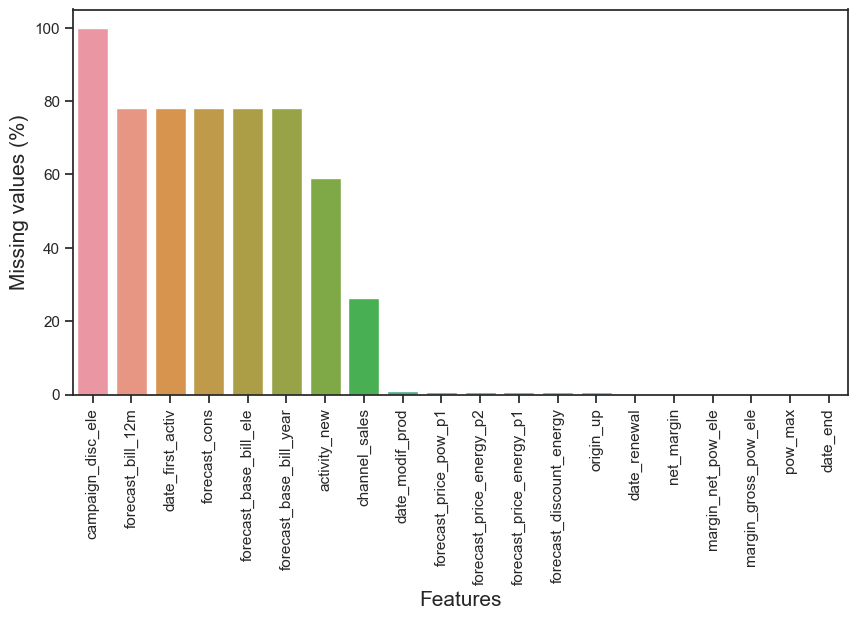

In [306]:
nan_count = ((client.isnull().sum()/client.shape[0])*100).sort_values(ascending=False)
nan_count = nan_count[nan_count>0]
plt.figure(figsize=(10,5))
plt.xlabel('Features', fontsize=15)
plt.ylabel('Missing values (%)', fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=nan_count.index, y=nan_count.values)

Campaign_disc_ele is 100% empty!

Removing it and the others 5 features with high null percentage...

In [307]:
client.drop(nan_count.index[:6],axis=1,inplace=True)
client.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,06/09/2017,06/09/2022,27/08/2021,07/09/2021,...,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
1,9c341e73685fcff6e3527ebd51da3fe5,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,13/12/2016,31/12/2022,13/12/2016,01/01/2022,...,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
2,97dd64b33716aadc4e22c4ab85d1c7a4,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,04/09/2016,04/09/2022,27/08/2021,05/09/2021,...,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
3,cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,03/01/2017,03/01/2023,03/01/2017,04/01/2022,...,44.311378,f,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
4,c7c8ee9daf2a864d159d45a2373ada72,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,07/10/2017,07/10/2022,27/08/2021,09/10/2021,...,44.311378,f,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150


In [308]:
client['activity_new'] = client['activity_new'].fillna('new activity')
client['channel_sales'] = client['channel_sales'].fillna('new channel')

In [309]:
client[nan_count.index[7:]].nunique()

channel_sales                   8
date_modif_prod              2423
forecast_price_pow_p1          48
forecast_price_energy_p2      439
forecast_price_energy_p1      658
forecast_discount_energy       14
origin_up                       6
date_renewal                  420
net_margin                  15761
margin_net_pow_ele           3338
margin_gross_pow_ele         3304
pow_max                       985
date_end                      372
dtype: int64

In [310]:
client[nan_count.index[7:]].isnull().sum()

channel_sales                 0
date_modif_prod             202
forecast_price_pow_p1       150
forecast_price_energy_p2    150
forecast_price_energy_p1    150
forecast_discount_energy    150
origin_up                   114
date_renewal                 44
net_margin                   18
margin_net_pow_ele           15
margin_gross_pow_ele         15
pow_max                       4
date_end                      2
dtype: int64

Filling missing dates with the next row.

In [311]:
client[['date_modif_prod','date_renewal','date_end']] = client[['date_modif_prod','date_renewal', 'date_end']].fillna(method='bfill')

Replacing missing values with most frequent.

In [312]:
origin_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
client[['origin_up']] = origin_imp.fit_transform(client[['origin_up']])

In [313]:
imp_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
client[[x for x in nan_count.index[7:] if x not in ['date_modif_prod', 'date_renewal','origin_up','date_end']]] = imp_freq.fit_transform(
    client[[x for x in nan_count.index[7:] if x not in ['date_modif_prod', 'date_renewal','origin_up','date_end']]])

In [314]:
df = pd.merge(client, churn, on=['id'])


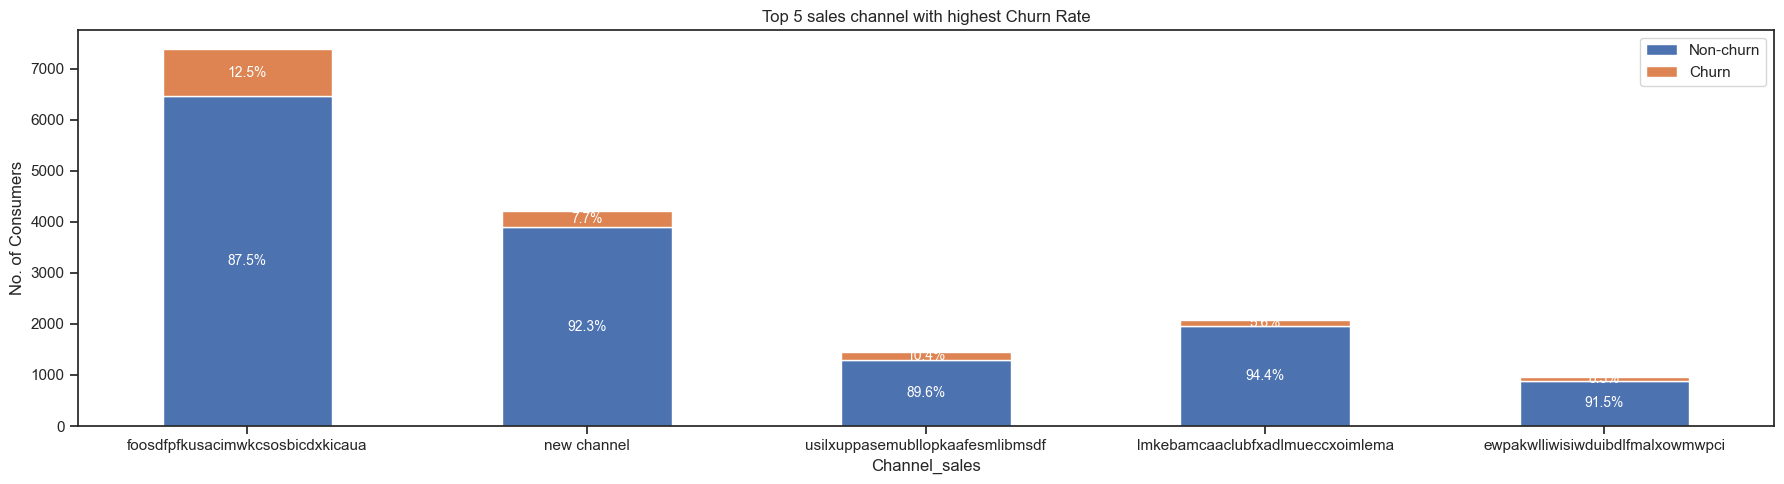

In [315]:
sales = df[["channel_sales", "churn", "id"]].groupby([
    "channel_sales", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:5]
sales_percentage = (sales.div(sales.sum(axis=1), axis=0) * 100)

# Plotting
ax = sales.plot(kind="bar", figsize=(18, 5), stacked=True, rot=0, title="Top 5 sales channel with highest Churn Rate")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in sales.index}

# Add percentage annotations to each bar
for channel in sales.index:
    for col in sales.columns:
        value = sales.loc[channel, col]
        percentage = sales_percentage.loc[channel, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[channel] + value/2
        ax.text(sales.index.get_loc(channel), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[channel] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("Channel_sales")
plt.tight_layout()
plt.show()

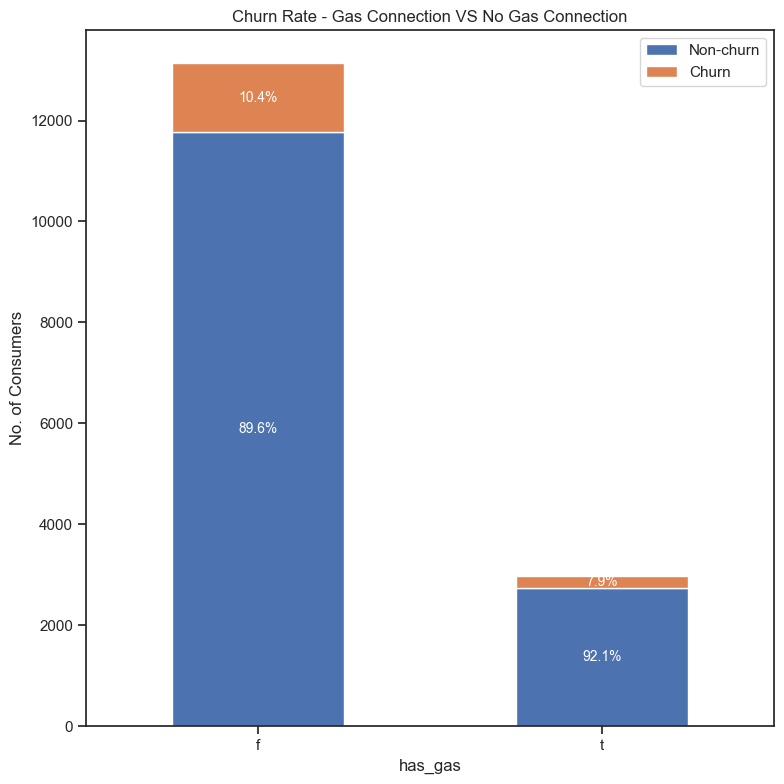

In [316]:
cons_12m = df[["has_gas", "churn", "id"]].groupby([
    "has_gas", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(8, 8), stacked=True, rot=0, title="Churn Rate - Gas Connection VS No Gas Connection")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for gas_status in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[gas_status, col]
        percentage = cons_12m_percentage.loc[gas_status, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[gas_status] + value/2
        ax.text(cons_12m.index.get_loc(gas_status), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[gas_status] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("has_gas")
plt.tight_layout()
plt.show()


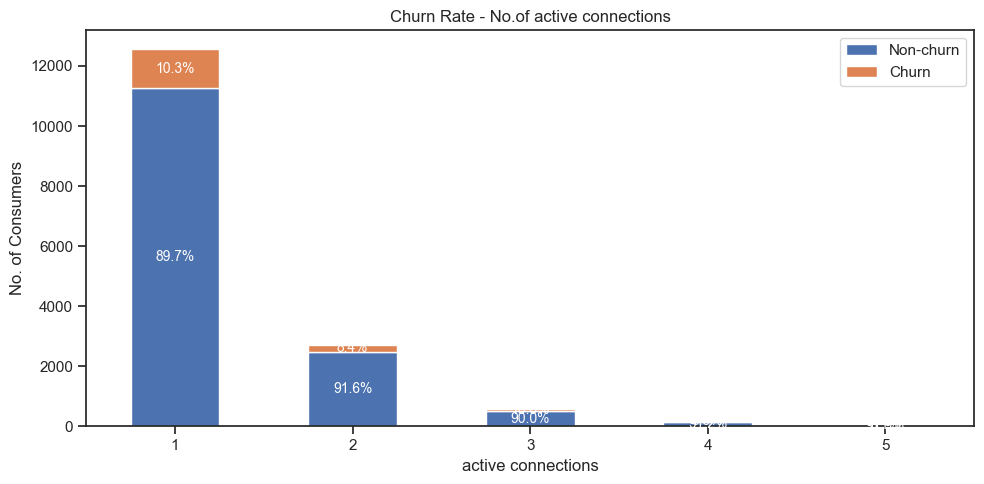

In [317]:
cons_12m = df[["nb_prod_act", "churn", "id"]].groupby([
    "nb_prod_act", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:5]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(10, 5), stacked=True, rot=0, title="Churn Rate - No.of active connections")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for conn_status in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[conn_status, col]
        percentage = cons_12m_percentage.loc[conn_status, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[conn_status] + value/2
        ax.text(cons_12m.index.get_loc(conn_status), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[conn_status] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("active connections")
plt.tight_layout()
plt.show()

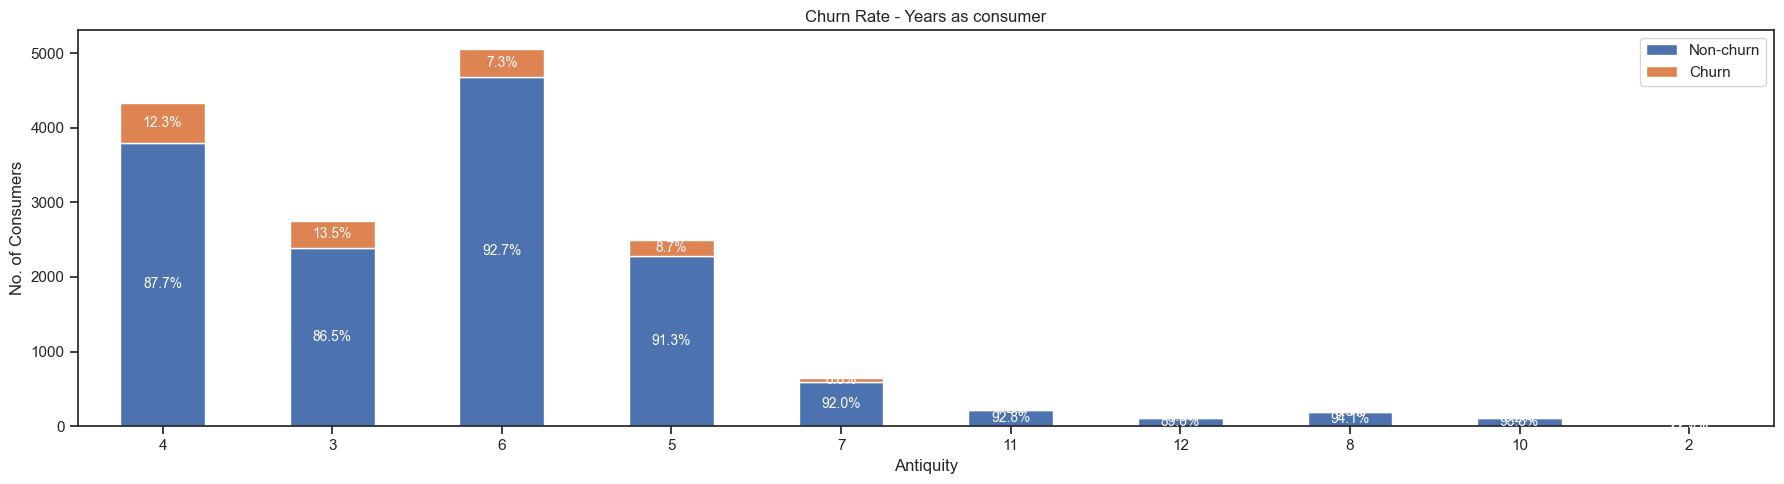

In [318]:
cons_12m = df[["num_years_antig", "churn", "id"]].groupby([
    "num_years_antig", "churn"])["id"].count().unstack(level=1).sort_values(by=[1], ascending=False)[:10]
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0) * 100)

# Plotting
ax = cons_12m.plot(kind="bar", figsize=(18, 5), stacked=True, rot=0, title="Churn Rate - Years as consumer")

# Variables to keep track of bar starting point (for stacked bars)
bar_starts = {key: 0 for key in cons_12m.index}

# Add percentage annotations to each bar
for year in cons_12m.index:
    for col in cons_12m.columns:
        value = cons_12m.loc[year, col]
        percentage = cons_12m_percentage.loc[year, col]

        # Calculate the position to place the text in the middle of the bar segment
        position = bar_starts[year] + value/2
        ax.text(cons_12m.index.get_loc(year), position, f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=10)

        # Update the starting position for the next segment of the bar (since it's stacked)
        bar_starts[year] += value

# Legend and labels
plt.legend(["Non-churn", "Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("Antiquity")
plt.tight_layout()
plt.show()

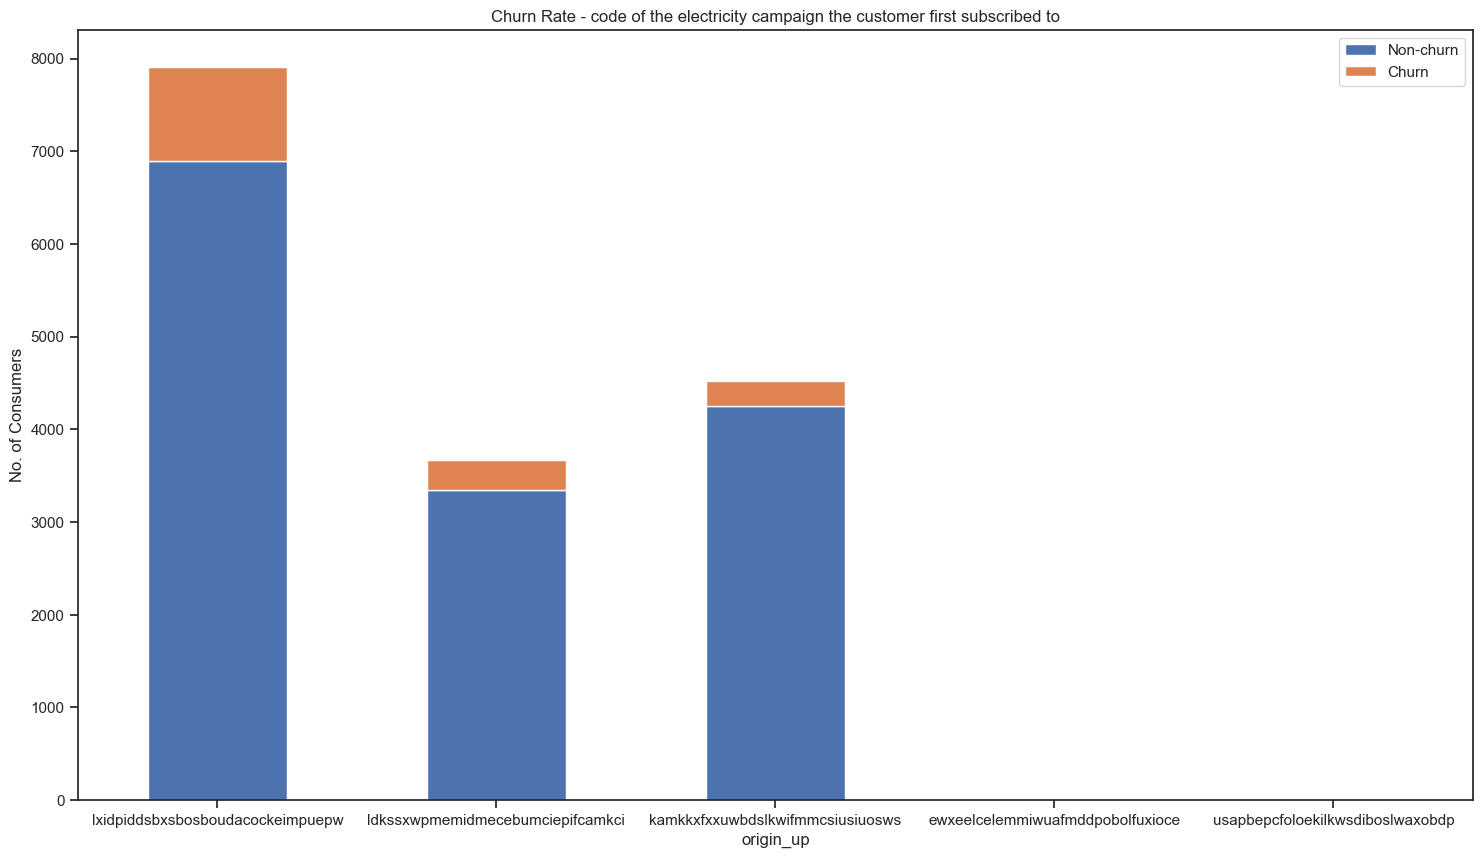

In [319]:
cons_12m = df[["origin_up",
               "churn", "id"]].groupby([
    "origin_up","churn"])["id"].count().unstack(level=1).sort_values(by=[1],ascending=False)
cons_12m_percentage = (cons_12m.div(cons_12m.sum(axis=1), axis=0)*100)
cons_12m.plot(kind="bar",
 figsize=(18,10),
 stacked=True,
rot=0,
 title= "Churn Rate - code of the electricity campaign the customer first subscribed to")
# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("origin_up")
plt.show()

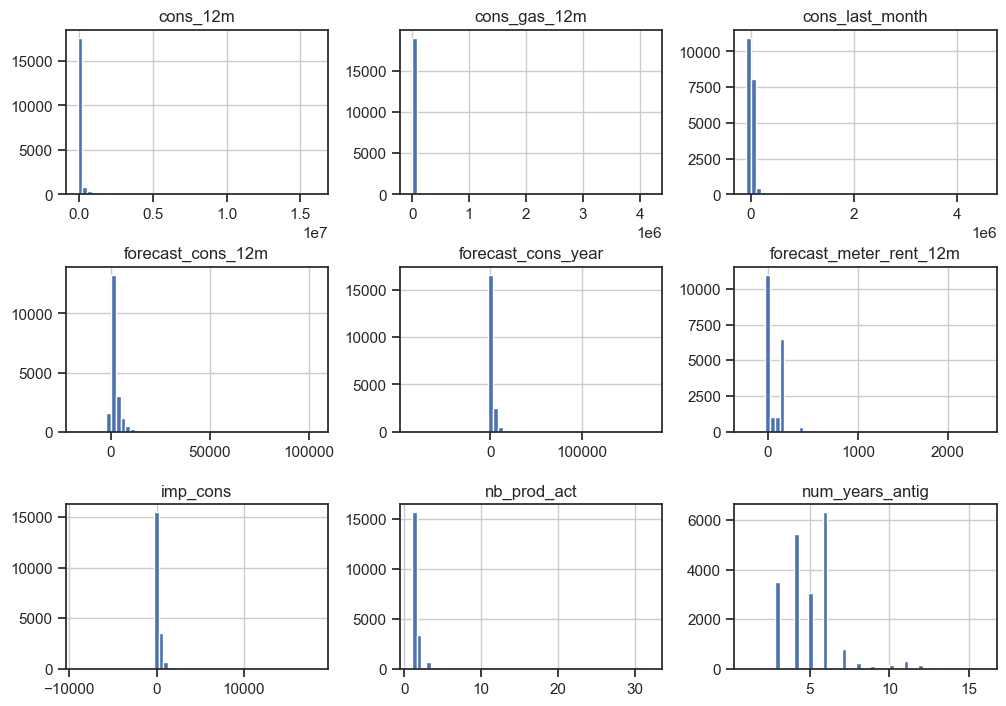

In [320]:
client.hist(bins=50, figsize=(10,7))
plt.tight_layout(pad=0.4)
plt.show()

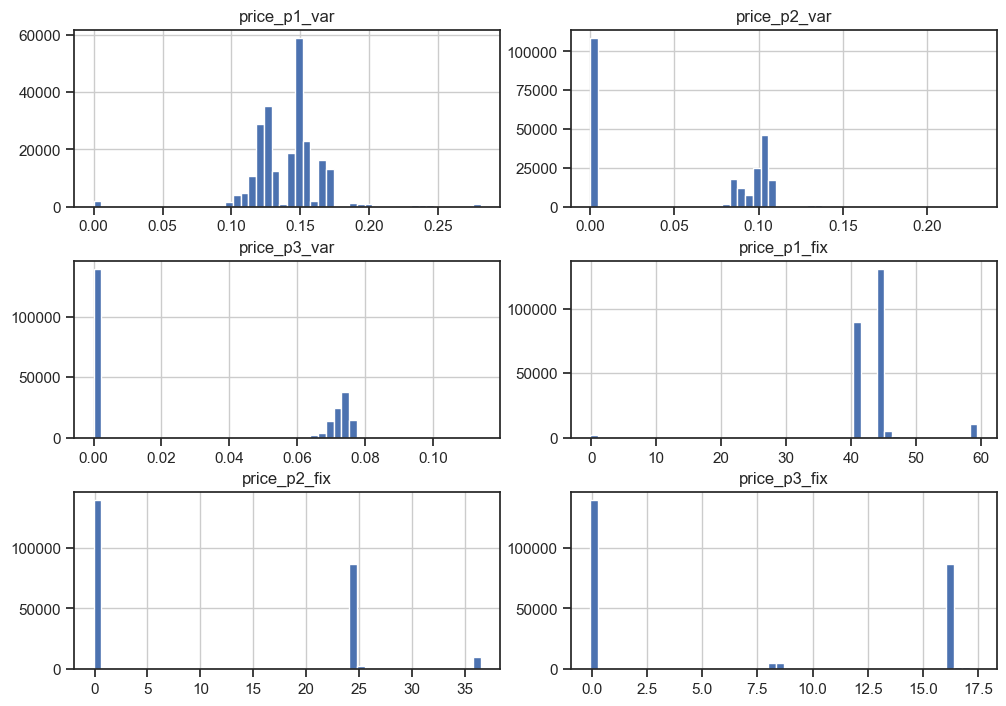

In [321]:
price.hist(bins=50, figsize=(10,7))
plt.tight_layout(pad=0.4)
plt.show()

In [322]:
# List of date columns
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

# For each column, remove problematic dates
for col in date_columns:
    mask = pd.to_datetime(df[col], dayfirst=True, errors='coerce').isna()
    problematic_dates = df[col][mask]

    # If there are problematic dates, print them and remove associated rows
    if len(problematic_dates) > 0:
        print(f"Problematic dates in {col}:")
        print(problematic_dates)
        df.drop(index=problematic_dates.index, inplace=True)

# Convert each column to DateTime format
for col in date_columns:
    df[col] = pd.to_datetime(df[col], dayfirst=True)

Problematic dates in date_activ:
1264     29/02/2018
1577     29/02/2018
4218     29/02/2018
6302     29/02/2018
7246     29/02/2018
8648     29/02/2018
13622    29/02/2018
15115    29/02/2018
Name: date_activ, dtype: object
Problematic dates in date_end:
47       29/02/2022
572      29/02/2022
1644     29/02/2022
1888     29/02/2022
2163     29/02/2022
            ...    
15304    29/02/2022
15557    29/02/2022
15574    29/02/2022
15654    29/02/2022
15788    29/02/2022
Name: date_end, Length: 65, dtype: object


## Identification of numerical and categorical columns

In [323]:
numerica_cols = ["cons_12m", "cons_gas_12m", "cons_last_month", "date_activ", "date_end", "date_first_activ", "date_modif_prod", "date_renewal", "forecast_base_bill_ele", "forecast_base_bill_year", "forecast_bill_12m", "forecast_cons", "forecast_cons_12m", "forecast_cons_year", "forecast_discount_energy", "forecast_meter_rent_12m", "forecast_price_energy_p1", "forecast_price_energy_p2", "forecast_price_pow_p1", "imp_cons", "margin_gross_pow_ele", "margin_net_pow_ele", "nb_prod_act", "net_margin", "num_years_antig", "pow_max"]
categorica_cols = ["id", "activity_new", "campaign_disc_ele", "channel_sales", "has_gas", "origin_up", "churn"]

print('Colunas numéricas:', numerica_cols)
print('Colunas categóricas:', categorica_cols)

Colunas numéricas: ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod', 'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max']
Colunas categóricas: ['id', 'activity_new', 'campaign_disc_ele', 'channel_sales', 'has_gas', 'origin_up', 'churn']


# Descriptive analysis after data processing

In [324]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,imp_cons,nb_prod_act,num_years_antig,churn
count,1.602300e+04,1.602300e+04,1.602300e+04,16023,16023,16023,16023,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000,16023.000000
mean,1.945781e+05,3.200227e+04,1.943322e+04,2017-01-17 00:27:35.420333312,2022-07-28 06:27:20.591649536,2018-12-14 07:59:54.607751424,2021-07-21 13:32:09.750982912,2369.506865,1906.893840,70.322933,196.024253,1.348312,5.029895,0.099170
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,2006-07-25 00:00:00,2012-08-26 00:00:00,2006-07-25 00:00:00,2019-06-26 00:00:00,-16689.260000,-85627.000000,-242.960000,-9038.210000,1.000000,1.000000,0.000000
25%,5.895500e+03,0.000000e+00,0.000000e+00,2016-01-12 00:00:00,2022-04-30 00:00:00,2016-08-08 00:00:00,2021-04-21 00:00:00,512.500000,0.000000,16.230000,0.000000,1.000000,4.000000,0.000000
50%,1.530300e+04,0.000000e+00,8.980000e+02,2017-03-04 00:00:00,2022-07-31 00:00:00,2019-04-29 00:00:00,2021-07-27 00:00:00,1178.310000,377.000000,19.440000,44.320000,1.000000,5.000000,0.000000
75%,5.006350e+04,0.000000e+00,4.115500e+03,2018-04-27 00:00:00,2022-11-01 00:00:00,2021-05-24 00:00:00,2021-10-30 00:00:00,2689.435000,1992.500000,131.485000,217.610000,1.000000,6.000000,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,2020-09-01 00:00:00,2023-06-13 00:00:00,2022-01-29 00:00:00,2022-01-28 00:00:00,103801.930000,175375.000000,2411.690000,15042.790000,32.000000,16.000000,1.000000
std,6.801762e+05,1.779524e+05,8.245585e+04,NaN,NaN,NaN,NaN,4039.712325,5264.374084,79.038711,494.967193,1.462746,1.675651,0.298899


# Graphs to visualize the relationship between the chosen variables

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


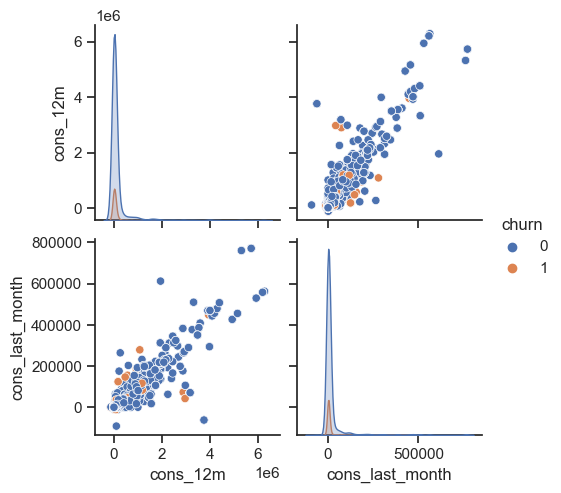

In [325]:
test_regressão = df[['cons_12m', 'cons_last_month','churn']]
teste = test_regressão['cons_12m'].idxmax()
df_without_high_cons = test_regressão.drop(teste)

sns.set(style="ticks")
sns.pairplot(df_without_high_cons, hue="churn")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


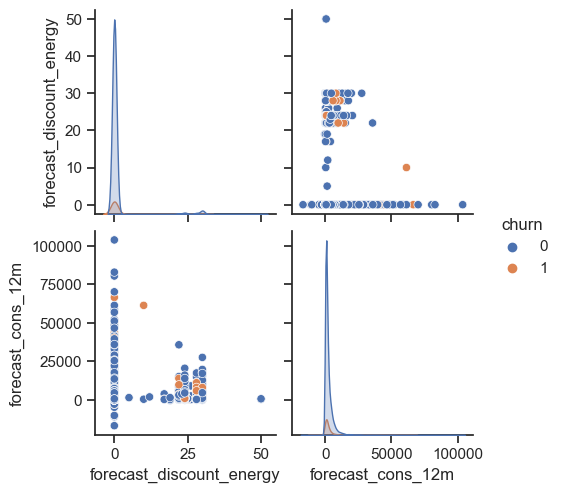

In [326]:
test_regressão = df[['forecast_discount_energy', 'forecast_cons_12m','churn']]

sns.set(style="ticks")
sns.pairplot(test_regressão, hue="churn")
plt.show()

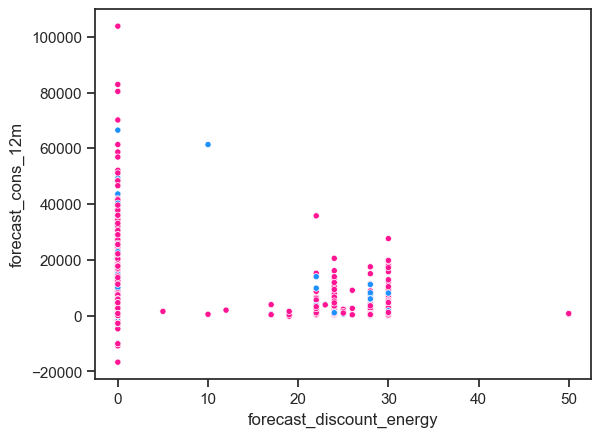

In [327]:
# Creating the scatter plot
colors = df['churn'].map({1: 'dodgerblue', 0: 'deeppink'})
ax = df.plot.scatter(x='forecast_discount_energy', y='forecast_cons_12m', c = colors, edgecolors='w', linewidth=0.5)

# Showing the chart
plt.show()

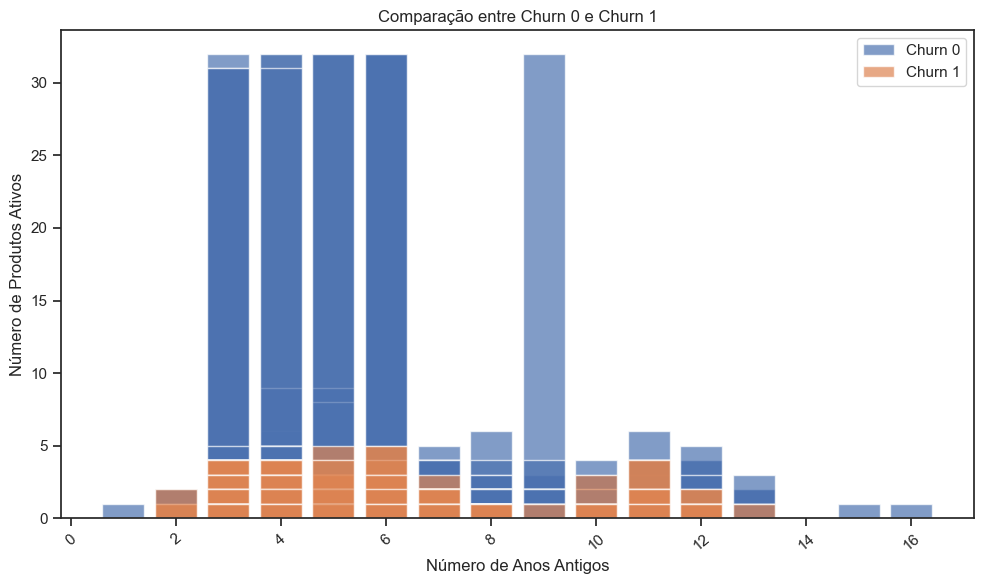

In [328]:
churn0= df[df['churn'] == 0]
churn1= df[df['churn'] == 1]
plt.figure(figsize=(10, 6))
plt.bar(churn0['num_years_antig'], churn0['nb_prod_act'], label='Churn 0', alpha=0.7)
plt.bar(churn1['num_years_antig'], churn1['nb_prod_act'], label='Churn 1', alpha=0.7)
plt.xlabel('Número de Anos Antigos')
plt.ylabel('Número de Produtos Ativos')
plt.title('Comparação entre Churn 0 e Churn 1')
plt.xticks(rotation=40)
plt.legend()

plt.tight_layout()
plt.show()

([<matplotlib.patches.Wedge at 0x17dc4df4bd0>,
 [Text(-1.0470449880908288, 0.33718955042212767, '0'),
  Text(1.0470449565208602, -0.3371896484535525, '1')],
 [Text(-0.5711154480495428, 0.18392157295752415, '90.1%'),
  Text(0.5711154308295601, -0.18392162642921042, '9.9%')])

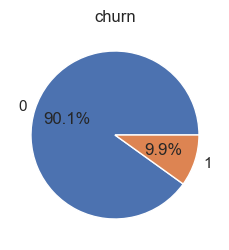

In [329]:
sizes = df['churn'].value_counts(sort = True)
labels = np.unique(df.churn)
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("churn")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Feature Engineering

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16023 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16023 non-null  object        
 1   activity_new              16023 non-null  object        
 2   channel_sales             16023 non-null  object        
 3   cons_12m                  16023 non-null  int64         
 4   cons_gas_12m              16023 non-null  int64         
 5   cons_last_month           16023 non-null  int64         
 6   date_activ                16023 non-null  datetime64[ns]
 7   date_end                  16023 non-null  datetime64[ns]
 8   date_modif_prod           16023 non-null  datetime64[ns]
 9   date_renewal              16023 non-null  datetime64[ns]
 10  forecast_cons_12m         16023 non-null  float64       
 11  forecast_cons_year        16023 non-null  int64         
 12  forecast_discount_energ

In [331]:
df = df[~df.applymap(lambda x: isinstance(x, (int, float)) and x < 0).any(axis=1)]


In [332]:
df.loc[:, 'contract_tenure'] = (df['date_end'] - df['date_activ']).apply(lambda x: x.days)

C:\Users\leogk\AppData\Local\Temp\ipykernel_20012\1361488024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'contract_tenure'] = (df['date_end'] - df['date_activ']).apply(lambda x: x.days)


In [333]:
df['renovation_tenure'] = (df['date_renewal'] - df['date_modif_prod']).apply(lambda x: x.days)

C:\Users\leogk\AppData\Local\Temp\ipykernel_20012\2618130037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['renovation_tenure'] = (df['date_renewal'] - df['date_modif_prod']).apply(lambda x: x.days)


In [334]:
df['contract_tenure_year'] = df['contract_tenure'].apply(lambda x: int(np.round(x / 365)))

C:\Users\leogk\AppData\Local\Temp\ipykernel_20012\1645455172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contract_tenure_year'] = df['contract_tenure'].apply(lambda x: int(np.round(x / 365)))


Separate columns into quarters

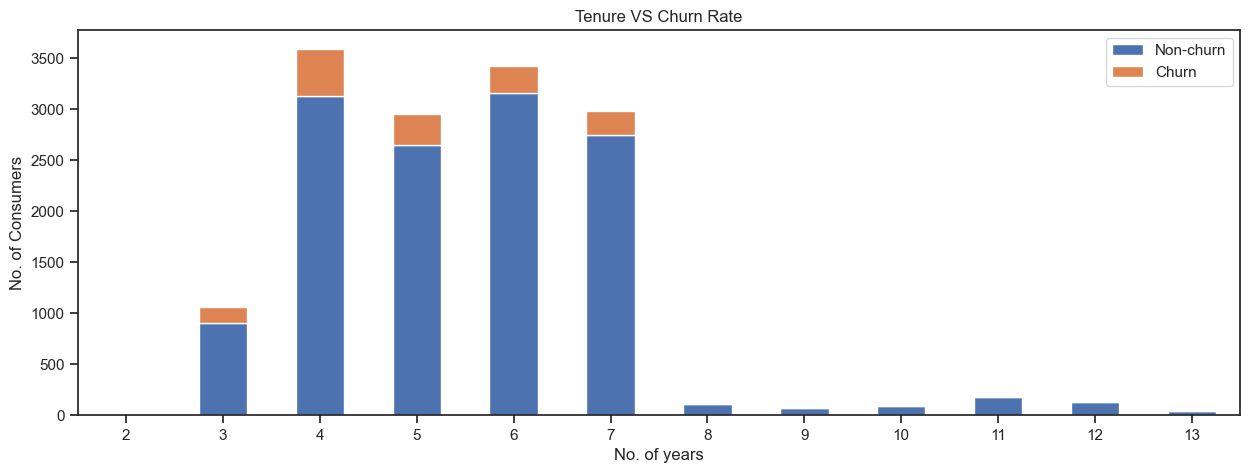

In [335]:
tenure = df[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
tenure.plot(kind="bar",
 figsize=(15,5),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate"),

# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

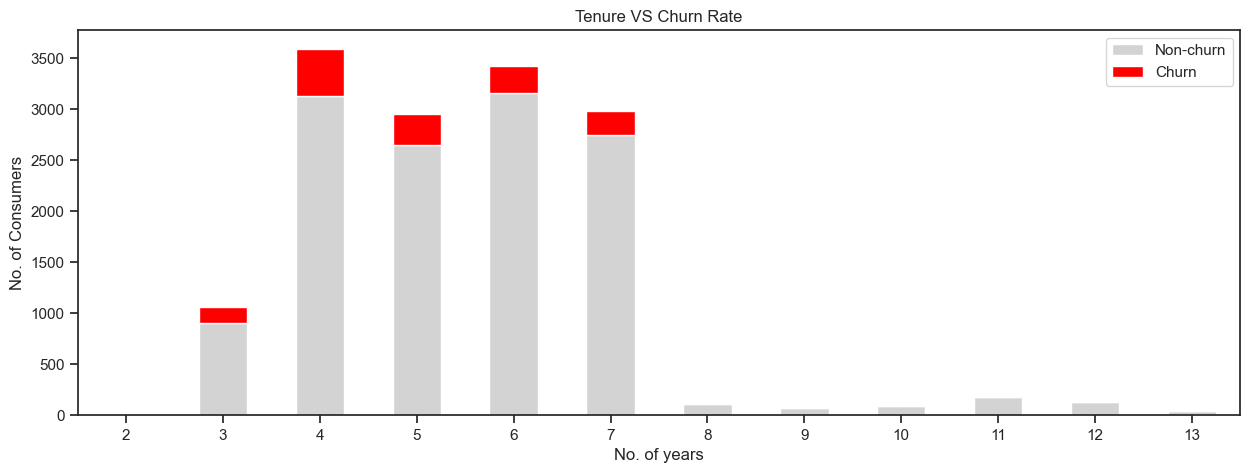

In [336]:
tenure = df[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year",
                                                                 "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0)*100)
custom_colors = ["lightgray", "red"]
tenure.plot(kind="bar",
 figsize=(15,5),
 stacked=True,
rot=0,
 title= "Tenure VS Churn Rate",
 color=custom_colors)

# Rename legend
plt.legend(["Non-churn", "Churn"], loc="upper right")
# Labels
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()

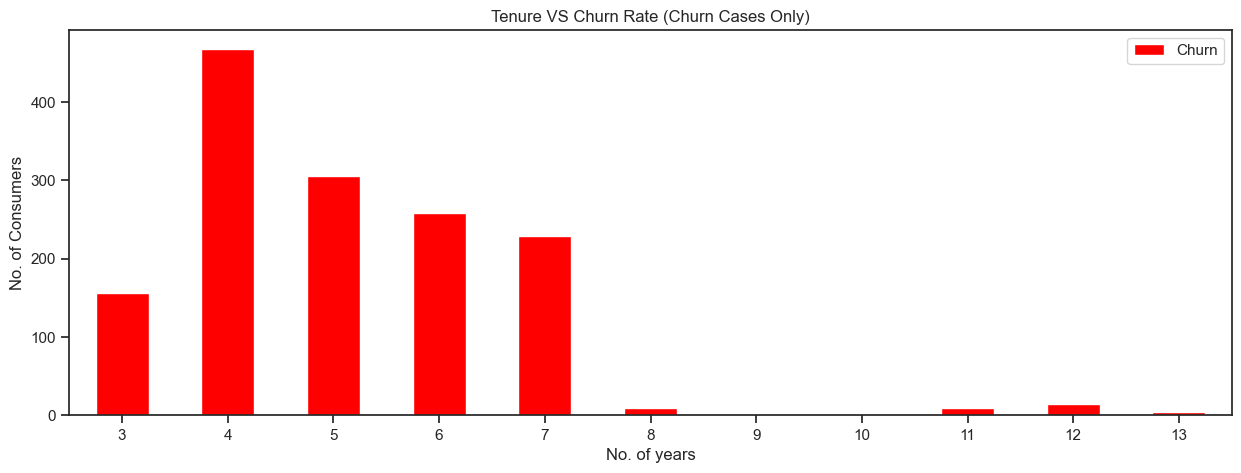

In [337]:
churn_data = df[df["churn"] == 1]
tenure = churn_data[["contract_tenure_year", "churn", "id"]].groupby(["contract_tenure_year", "churn"])["id"].count().unstack(level=1)
tenure_percentage = (tenure.div(tenure.sum(axis=1), axis=0) * 100)
tenure.plot(kind="bar",
            figsize=(15, 5),
            stacked=True,
            rot=0,
            title="Tenure VS Churn Rate (Churn Cases Only)",
            color="red")
plt.legend(["Churn"], loc="upper right")
plt.ylabel("No. of Consumers")
plt.xlabel("No. of years")
plt.show()


It appears that medium-term contracts have the most churn by far...

Calculating the deviation between last month bill and last 12 months average:

In [338]:
df['bill_dev'] = (df['cons_12m']/12) - df['cons_last_month']

C:\Users\leogk\AppData\Local\Temp\ipykernel_20012\817011021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bill_dev'] = (df['cons_12m']/12) - df['cons_last_month']


Calculate the ratio of last 12month consumption to next 12 month forecasted consumption:

In [339]:
def handleInf(x):
    if x==float('-inf') or x==float('inf'):
        return 0

In [340]:
df['cons_pattern'] = df['forecast_cons_12m'] / df['cons_12m']
df.cons_pattern = df.cons_pattern.apply(handleInf)

C:\Users\leogk\AppData\Local\Temp\ipykernel_20012\1339534947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cons_pattern'] = df['forecast_cons_12m'] / df['cons_12m']
C:\Users\leogk\AppData\Local\Temp\ipykernel_20012\1339534947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cons_pattern = df.cons_pattern.apply(handleInf)


In [341]:
price.shape

(241238, 8)

In [342]:
price.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,3acc714fbd9b3ccaac3c412cf220e929,01/01/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0
1,3acc714fbd9b3ccaac3c412cf220e929,01/02/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0
2,3acc714fbd9b3ccaac3c412cf220e929,01/03/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0


In [343]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
price[['price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']] = imp_freq.fit_transform(
    price[['price_p1_var','price_p2_var','price_p3_var','price_p1_fix','price_p2_fix','price_p3_fix']])

In [344]:
colunas_para_converter = ['price_p1_fix', 'price_p1_var', 'price_p2_fix', 'price_p2_var', 'price_p3_fix', 'price_p3_var']
price[colunas_para_converter] = price[colunas_para_converter].astype(float)

In [345]:
def calculate_consumption(fix_price, var_price):
    if var_price != 0:
        return fix_price / var_price
    else:
        return 0

price["consumption_p1"] = price.apply(lambda row: calculate_consumption(row["price_p1_fix"], row["price_p1_var"]), axis=1)
price["consumption_p2"] = price.apply(lambda row: calculate_consumption(row["price_p2_fix"], row["price_p2_var"]), axis=1)
price["consumption_p3"] = price.apply(lambda row: calculate_consumption(row["price_p3_fix"], row["price_p3_var"]), axis=1)
#d_price = d_price.drop(['price_p1_fix', 'price_p1_var', 'price_p2_fix', 'price_p2_var', 'price_p3_fix', 'price_p3_var'], axis=1)

In [346]:
price.isnull().sum()

id                0
price_date        0
price_p1_var      0
price_p2_var      0
price_p3_var      0
price_p1_fix      0
price_p2_fix      0
price_p3_fix      0
consumption_p1    0
consumption_p2    0
consumption_p3    0
dtype: int64

In [347]:
price.groupby('id')[['consumption_p1', 'consumption_p2', 'consumption_p3']].mean()

,consumption_p1,consumption_p2,consumption_p3
id,,,
0002203ffbb812588b632b9e628cc38d,327.659237,235.363953,222.602013
000381698491fec6983d55828fe5ada6,580.977007,402.293909,126.270167
0004351ebdd665e6ee664792efc4fd13,303.191801,0.000000,0.000000
000861c9aa2a0784b8d83f8b5b95d010,326.869860,234.344025,216.873292
0010bcc39e42b3c2131ed2ce55246e3c,254.036436,0.000000,0.000000
...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,304.289727,220.146801,208.531834
fffac626da707b1b5ab11e8431a4d0a2,301.218347,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,267.579560,192.318306,177.097052


In [348]:
price.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3
0,3acc714fbd9b3ccaac3c412cf220e929,01/01/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0
1,3acc714fbd9b3ccaac3c412cf220e929,01/02/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0
2,3acc714fbd9b3ccaac3c412cf220e929,01/03/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0


In [349]:
count_distribution = price.groupby('id').size().value_counts().sort_index()
print(count_distribution)

7         5
8         5
9         9
10       14
11      102
12    19985
Name: count, dtype: int64


In [350]:
""" client_churn_info = df[['id','churn']]
price_df = client_churn_info.merge(price,on='id') """

" client_churn_info = df[['id','churn']]\nprice_df = client_churn_info.merge(price,on='id') "

In [351]:
""" price_df['price_date'].dtypes """

" price_df['price_date'].dtypes "

In [352]:
""" #Spliting the dataset into churn and non-churn price by price date
churn_price = price_df[price_df['churn']==1].groupby(['price_date']).mean()
non_churn_price = price_df[price_df['churn']==0].groupby('price_date').mean() """

" #Spliting the dataset into churn and non-churn price by price date\nchurn_price = price_df[price_df['churn']==1].groupby(['price_date']).mean()\nnon_churn_price = price_df[price_df['churn']==0].groupby('price_date').mean() "

In [353]:
""" #Plotting average price of energy by month 
plt.figure(figsize=(15,3))
plt.xticks(rotation=45)
plt.subplot(131)
non_churn_grp_price.price_off_peak_var.plot()
churn_grp_price.price_off_peak_var.plot()
plt.xticks(rotation=45)
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at off peak')
plt.subplot(132)
non_churn_grp_price.price_peak_var.plot()
churn_grp_price.price_peak_var.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at peak')
plt.xticks(rotation=45)
plt.subplot(133)
non_churn_grp_price.price_mid_peak_var.plot()
churn_grp_price.price_mid_peak_var.plot()
plt.legend(['Not Churn','Churn'])
plt.title('Energy price at mid peak')
plt.xticks(rotation=45)
plt.suptitle('Energy price of Non-Churn vs Churn Customers')
plt.subplots_adjust(top=0.8)
plt.show() """

" #Plotting average price of energy by month \nplt.figure(figsize=(15,3))\nplt.xticks(rotation=45)\nplt.subplot(131)\nnon_churn_grp_price.price_off_peak_var.plot()\nchurn_grp_price.price_off_peak_var.plot()\nplt.xticks(rotation=45)\nplt.legend(['Not Churn','Churn'])\nplt.title('Energy price at off peak')\nplt.subplot(132)\nnon_churn_grp_price.price_peak_var.plot()\nchurn_grp_price.price_peak_var.plot()\nplt.legend(['Not Churn','Churn'])\nplt.title('Energy price at peak')\nplt.xticks(rotation=45)\nplt.subplot(133)\nnon_churn_grp_price.price_mid_peak_var.plot()\nchurn_grp_price.price_mid_peak_var.plot()\nplt.legend(['Not Churn','Churn'])\nplt.title('Energy price at mid peak')\nplt.xticks(rotation=45)\nplt.suptitle('Energy price of Non-Churn vs Churn Customers')\nplt.subplots_adjust(top=0.8)\nplt.show() "

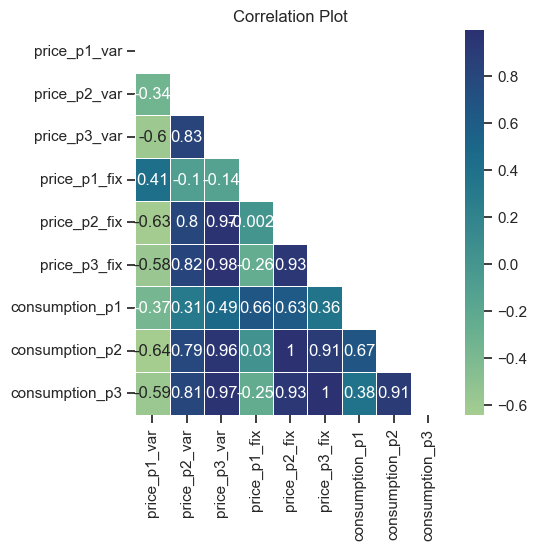

In [354]:
plt.figure(figsize=(5,5))
price_corr = price.iloc[:, 2:].corr()
mask = np.triu(np.ones_like(price_corr))
sns.heatmap(price_corr,annot=True,cmap="crest",linewidth=.5,mask=mask)
plt.title('Correlation Plot')
plt.show()

In [355]:
def drop_highly_correlated_cols(df, threshold=0.95):
    """
    Drop columns that have a correlation above a given threshold, considering only numeric columns.

    Parameters:
    - df: DataFrame
    - threshold: Correlation threshold

    Returns:
    - DataFrame with columns removed
    """
    # Select only numeric columns for correlation computation
    numeric_cols = df.select_dtypes(include=[np.number])

    # Compute the correlation matrix
    corr_matrix = numeric_cols.corr().abs()

    # Get the upper triangle of the correlation matrix
    upper = corr_matrix.where(
        pd.DataFrame(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    )

    # Find columns to drop
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    # Drop the columns and return the modified DataFrame
    return df.drop(columns=to_drop)

price = drop_highly_correlated_cols(price, threshold=0.9)
price.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3
0,3acc714fbd9b3ccaac3c412cf220e929,01/01/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0
1,3acc714fbd9b3ccaac3c412cf220e929,01/02/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0
2,3acc714fbd9b3ccaac3c412cf220e929,01/03/2021,0.168185,0.084213,0.0,44.266931,0.0,0.0,263.2038,0.0,0.0


In [356]:
#Filtering out the January and December energy off peak (p1_var) price
price_off_peak_energy = price[['id','price_p1_var']]
first_prices = price_off_peak_energy.groupby('id').price_p1_var.first().reset_index().rename(columns={'price_p1_var':'price_off_peak_var_jan'})
last_prices = price_off_peak_energy.groupby('id').last().price_p1_var.reset_index().rename(columns={'price_p1_var':'price_off_peak_var_dec'})

In [357]:
price['price_date'] = pd.to_datetime(price['price_date'])

In [358]:
price.drop('price_p1_var',axis=1,inplace=True)

In [359]:
#Taking average of Power off-peak and mid-peak
price = price.groupby('id').mean().reset_index()

In [360]:
#Calculating Energy off peak difference
price = price.merge(first_prices,on='id').merge(last_prices,on='id')
price['energy_off_peak_variation'] = price.price_off_peak_var_jan - price.price_off_peak_var_dec
price.drop(['price_off_peak_var_jan','price_off_peak_var_dec'],axis=1,inplace=True)

In [361]:
price.head()

,id,price_date,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,energy_off_peak_variation
0,0002203ffbb812588b632b9e628cc38d,2021-01-06 12:00:00,0.103794,0.073160,40.701732,24.421038,16.280694,327.659237,235.363953,222.602013,0.006192
1,000381698491fec6983d55828fe5ada6,2021-01-06 12:00:00,0.090583,0.066138,59.055122,36.417707,8.350996,580.977007,402.293909,126.270167,0.008272
2,0004351ebdd665e6ee664792efc4fd13,2021-01-06 12:00:00,0.000000,0.000000,44.385450,0.000000,0.000000,303.191801,0.000000,0.000000,0.004104
3,000861c9aa2a0784b8d83f8b5b95d010,2021-01-06 12:00:00,0.104134,0.075021,40.661003,24.396601,16.264402,326.869860,234.344025,216.873292,0.007794
4,0010bcc39e42b3c2131ed2ce55246e3c,2021-01-06 12:00:00,0.000000,0.000000,45.319710,0.000000,0.000000,254.036436,0.000000,0.000000,-0.050443


In [362]:
price.shape

(20120, 11)

In [363]:
price.drop('price_date',axis=1,inplace=True)

In [364]:
df.shape

(14662, 32)

In [365]:
df = pd.merge(price, df, on=['id'])

In [366]:
df.shape

(14662, 41)

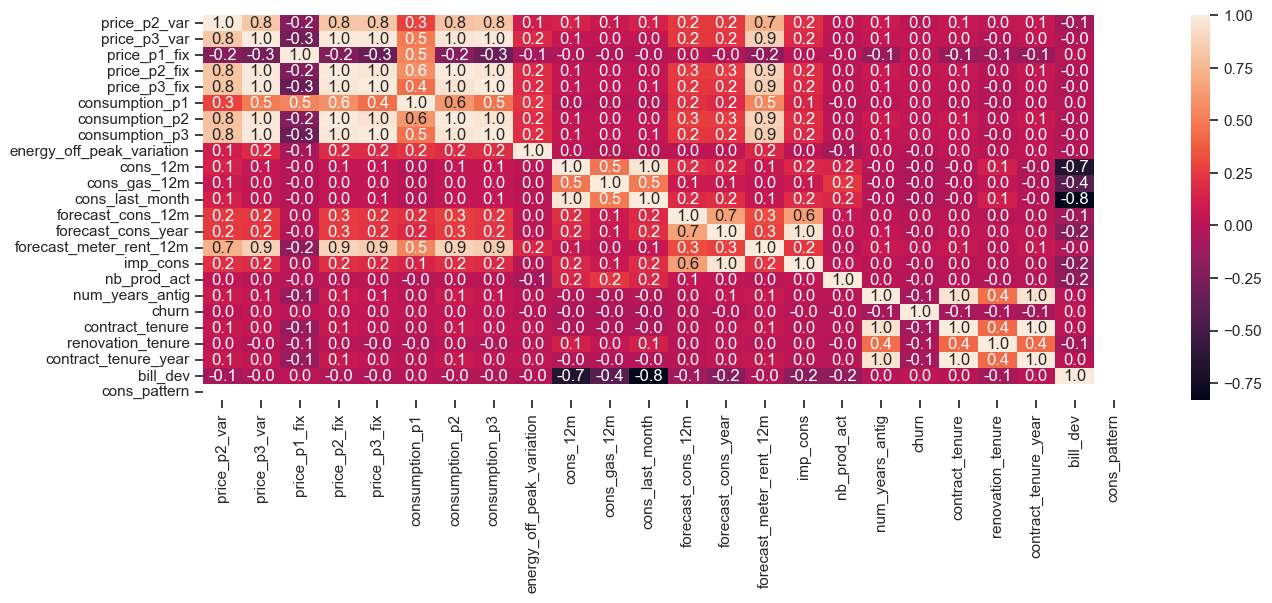

In [367]:
# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15,5))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".1f");

In [368]:
df.dtypes

id                                   object
price_p2_var                        float64
price_p3_var                        float64
price_p1_fix                        float64
price_p2_fix                        float64
price_p3_fix                        float64
consumption_p1                      float64
consumption_p2                      float64
consumption_p3                      float64
energy_off_peak_variation           float64
activity_new                         object
channel_sales                        object
cons_12m                              int64
cons_gas_12m                          int64
cons_last_month                       int64
date_activ                   datetime64[ns]
date_end                     datetime64[ns]
date_modif_prod              datetime64[ns]
date_renewal                 datetime64[ns]
forecast_cons_12m                   float64
forecast_cons_year                    int64
forecast_discount_energy             object
forecast_meter_rent_12m         

In [369]:
df.shape

(14662, 41)

In [370]:
df = df.drop_duplicates(subset='id', keep='first')

In [371]:
df.shape

(14662, 41)

In [372]:
price.isnull().sum()

id                           0
price_p2_var                 0
price_p3_var                 0
price_p1_fix                 0
price_p2_fix                 0
price_p3_fix                 0
consumption_p1               0
consumption_p2               0
consumption_p3               0
energy_off_peak_variation    0
dtype: int64

# Standardizing the units

In [373]:
df.columns

Index(['id', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix',
       'price_p3_fix', 'consumption_p1', 'consumption_p2', 'consumption_p3',
       'energy_off_peak_variation', 'activity_new', 'channel_sales',
       'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'contract_tenure', 'renovation_tenure', 'contract_tenure_year',
       'bill_dev', 'cons_pattern'],
      dtype='object')

In [374]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_column_names = df_numeric.columns
numeric_column_names

Index(['price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix',
       'price_p3_fix', 'consumption_p1', 'consumption_p2', 'consumption_p3',
       'energy_off_peak_variation', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_meter_rent_12m', 'imp_cons', 'nb_prod_act', 'num_years_antig',
       'churn', 'contract_tenure', 'renovation_tenure', 'contract_tenure_year',
       'bill_dev', 'cons_pattern'],
      dtype='object')

Apllying the PCA

In [375]:
id_column = df[['id']]

In [376]:
categorical = ['id','channel_sales','activity_new','origin_up','has_gas']
df_categorical = df[categorical]
df_churn = df[['id', 'churn']]

colunas_preditoras = numeric_column_names = df_numeric.columns

X = df[colunas_preditoras]

In [377]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
columns = X.columns  

In [378]:
X_scaled_df = pd.DataFrame(X_scaled, columns=columns)
X_scaled_df

,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,energy_off_peak_variation,cons_12m,...,forecast_meter_rent_12m,imp_cons,nb_prod_act,num_years_antig,churn,contract_tenure,renovation_tenure,contract_tenure_year,bill_dev,cons_pattern
0,1.048771,1.255807,-0.485118,1.242278,1.311708,0.520617,1.231120,1.330842,0.139808,-0.239603,...,1.142635,-0.327041,-0.411374,0.624040,-0.33217,0.360504,1.002198,0.304522,0.071097,NaN
1,-1.030247,-0.789230,0.319339,-0.784310,-0.784202,-0.008093,-0.779757,-0.783316,-0.032549,-0.270811,...,-0.847062,-0.445472,-0.411374,0.624040,-0.33217,0.833298,-0.225740,0.905371,0.144390,NaN
2,-1.030247,-0.789230,0.523364,-0.784310,-0.784202,-1.070278,-0.779757,-0.783316,-4.535217,-0.264942,...,-0.673410,0.175317,0.999848,-1.238426,-0.33217,-1.391810,-1.095394,-1.498023,0.108333,NaN
3,-1.030247,-0.789230,0.293457,-0.784310,-0.784202,-0.091933,-0.779757,-0.783316,-0.041629,-0.258289,...,-0.674916,-0.445472,-0.411374,0.624040,-0.33217,0.304298,0.968541,0.304522,0.172161,NaN
4,1.083787,1.305014,-0.479188,1.243630,1.313106,0.427442,1.199108,1.282527,0.138075,0.186449,...,1.231645,0.121416,-0.411374,-1.238426,-0.33217,-1.505876,-0.867395,-1.498023,0.262319,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,1.020356,1.229250,-0.505871,1.237546,1.306814,0.619073,1.254589,1.353032,0.494841,-0.074398,...,1.172606,1.277554,-0.411374,3.728151,-0.33217,3.580795,3.113905,3.308765,-0.005653,NaN
14658,-1.030247,-0.789230,0.303163,-0.784310,-0.784202,-0.050737,-0.779757,-0.783316,-0.059459,-0.049696,...,-0.674163,-0.445472,-0.411374,0.003218,-0.33217,0.304298,0.962027,0.304522,0.431218,NaN
14659,1.563605,1.861862,-0.385003,1.281673,1.373871,-0.777629,0.863351,0.898659,-0.226038,-0.207933,...,1.219596,1.294340,0.999848,-1.238426,-0.33217,-1.502570,-0.617681,-1.498023,-0.004821,NaN
14660,1.042865,1.271878,-0.505871,1.237546,1.306814,0.534129,1.232516,1.308880,0.403875,-0.222184,...,1.012509,0.970557,2.411069,-0.617604,-0.33217,-0.300747,0.564657,-0.296326,0.026784,NaN


In [379]:
id_column = id_column.set_index(X_scaled_df.index)  # Define o índice de id_column para corresponder a X_scaled_df
X_scaled_df = pd.concat([id_column, X_scaled_df], axis=1)
X_scaled_df

,id,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,energy_off_peak_variation,...,forecast_meter_rent_12m,imp_cons,nb_prod_act,num_years_antig,churn,contract_tenure,renovation_tenure,contract_tenure_year,bill_dev,cons_pattern
0,0002203ffbb812588b632b9e628cc38d,1.048771,1.255807,-0.485118,1.242278,1.311708,0.520617,1.231120,1.330842,0.139808,...,1.142635,-0.327041,-0.411374,0.624040,-0.33217,0.360504,1.002198,0.304522,0.071097,NaN
1,0004351ebdd665e6ee664792efc4fd13,-1.030247,-0.789230,0.319339,-0.784310,-0.784202,-0.008093,-0.779757,-0.783316,-0.032549,...,-0.847062,-0.445472,-0.411374,0.624040,-0.33217,0.833298,-0.225740,0.905371,0.144390,NaN
2,0010bcc39e42b3c2131ed2ce55246e3c,-1.030247,-0.789230,0.523364,-0.784310,-0.784202,-1.070278,-0.779757,-0.783316,-4.535217,...,-0.673410,0.175317,0.999848,-1.238426,-0.33217,-1.391810,-1.095394,-1.498023,0.108333,NaN
3,00114d74e963e47177db89bc70108537,-1.030247,-0.789230,0.293457,-0.784310,-0.784202,-0.091933,-0.779757,-0.783316,-0.041629,...,-0.674916,-0.445472,-0.411374,0.624040,-0.33217,0.304298,0.968541,0.304522,0.172161,NaN
4,0013f326a839a2f6ad87a1859952d227,1.083787,1.305014,-0.479188,1.243630,1.313106,0.427442,1.199108,1.282527,0.138075,...,1.231645,0.121416,-0.411374,-1.238426,-0.33217,-1.505876,-0.867395,-1.498023,0.262319,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,ffebf6a979dd0b17a41076df1057e733,1.020356,1.229250,-0.505871,1.237546,1.306814,0.619073,1.254589,1.353032,0.494841,...,1.172606,1.277554,-0.411374,3.728151,-0.33217,3.580795,3.113905,3.308765,-0.005653,NaN
14658,fffac626da707b1b5ab11e8431a4d0a2,-1.030247,-0.789230,0.303163,-0.784310,-0.784202,-0.050737,-0.779757,-0.783316,-0.059459,...,-0.674163,-0.445472,-0.411374,0.003218,-0.33217,0.304298,0.962027,0.304522,0.431218,NaN
14659,fffc0cacd305dd51f316424bbb08d1bd,1.563605,1.861862,-0.385003,1.281673,1.373871,-0.777629,0.863351,0.898659,-0.226038,...,1.219596,1.294340,0.999848,-1.238426,-0.33217,-1.502570,-0.617681,-1.498023,-0.004821,NaN
14660,fffe4f5646aa39c7f97f95ae2679ce64,1.042865,1.271878,-0.505871,1.237546,1.306814,0.534129,1.232516,1.308880,0.403875,...,1.012509,0.970557,2.411069,-0.617604,-0.33217,-0.300747,0.564657,-0.296326,0.026784,NaN


In [380]:
df = X_scaled_df
df

,id,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,energy_off_peak_variation,...,forecast_meter_rent_12m,imp_cons,nb_prod_act,num_years_antig,churn,contract_tenure,renovation_tenure,contract_tenure_year,bill_dev,cons_pattern
0,0002203ffbb812588b632b9e628cc38d,1.048771,1.255807,-0.485118,1.242278,1.311708,0.520617,1.231120,1.330842,0.139808,...,1.142635,-0.327041,-0.411374,0.624040,-0.33217,0.360504,1.002198,0.304522,0.071097,NaN
1,0004351ebdd665e6ee664792efc4fd13,-1.030247,-0.789230,0.319339,-0.784310,-0.784202,-0.008093,-0.779757,-0.783316,-0.032549,...,-0.847062,-0.445472,-0.411374,0.624040,-0.33217,0.833298,-0.225740,0.905371,0.144390,NaN
2,0010bcc39e42b3c2131ed2ce55246e3c,-1.030247,-0.789230,0.523364,-0.784310,-0.784202,-1.070278,-0.779757,-0.783316,-4.535217,...,-0.673410,0.175317,0.999848,-1.238426,-0.33217,-1.391810,-1.095394,-1.498023,0.108333,NaN
3,00114d74e963e47177db89bc70108537,-1.030247,-0.789230,0.293457,-0.784310,-0.784202,-0.091933,-0.779757,-0.783316,-0.041629,...,-0.674916,-0.445472,-0.411374,0.624040,-0.33217,0.304298,0.968541,0.304522,0.172161,NaN
4,0013f326a839a2f6ad87a1859952d227,1.083787,1.305014,-0.479188,1.243630,1.313106,0.427442,1.199108,1.282527,0.138075,...,1.231645,0.121416,-0.411374,-1.238426,-0.33217,-1.505876,-0.867395,-1.498023,0.262319,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,ffebf6a979dd0b17a41076df1057e733,1.020356,1.229250,-0.505871,1.237546,1.306814,0.619073,1.254589,1.353032,0.494841,...,1.172606,1.277554,-0.411374,3.728151,-0.33217,3.580795,3.113905,3.308765,-0.005653,NaN
14658,fffac626da707b1b5ab11e8431a4d0a2,-1.030247,-0.789230,0.303163,-0.784310,-0.784202,-0.050737,-0.779757,-0.783316,-0.059459,...,-0.674163,-0.445472,-0.411374,0.003218,-0.33217,0.304298,0.962027,0.304522,0.431218,NaN
14659,fffc0cacd305dd51f316424bbb08d1bd,1.563605,1.861862,-0.385003,1.281673,1.373871,-0.777629,0.863351,0.898659,-0.226038,...,1.219596,1.294340,0.999848,-1.238426,-0.33217,-1.502570,-0.617681,-1.498023,-0.004821,NaN
14660,fffe4f5646aa39c7f97f95ae2679ce64,1.042865,1.271878,-0.505871,1.237546,1.306814,0.534129,1.232516,1.308880,0.403875,...,1.012509,0.970557,2.411069,-0.617604,-0.33217,-0.300747,0.564657,-0.296326,0.026784,NaN


In [285]:
df = pd.merge(df, df_categorical, on = 'id')
df

,id,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,energy_off_peak_variation,...,churn,contract_tenure,renovation_tenure,contract_tenure_year,bill_dev,cons_pattern,channel_sales,activity_new,origin_up,has_gas
0,0002203ffbb812588b632b9e628cc38d,1.048771,1.255807,-0.485118,1.242278,1.311708,0.520617,1.231120,1.330842,0.139808,...,-0.33217,0.360504,1.002198,0.304522,0.071097,NaN,foosdfpfkusacimwkcsosbicdxkicaua,new activity,kamkkxfxxuwbdslkwifmmcsiusiuosws,f
1,0004351ebdd665e6ee664792efc4fd13,-1.030247,-0.789230,0.319339,-0.784310,-0.784202,-0.008093,-0.779757,-0.783316,-0.032549,...,-0.33217,0.833298,-0.225740,0.905371,0.144390,NaN,new channel,new activity,kamkkxfxxuwbdslkwifmmcsiusiuosws,f
2,0010bcc39e42b3c2131ed2ce55246e3c,-1.030247,-0.789230,0.523364,-0.784310,-0.784202,-1.070278,-0.779757,-0.783316,-4.535217,...,-0.33217,-1.391810,-1.095394,-1.498023,0.108333,NaN,usilxuppasemubllopkaafesmlibmsdf,fskfsbkdioupwobbsaoospkxaafmwobl,lxidpiddsbxsbosboudacockeimpuepw,f
3,00114d74e963e47177db89bc70108537,-1.030247,-0.789230,0.293457,-0.784310,-0.784202,-0.091933,-0.779757,-0.783316,-0.041629,...,-0.33217,0.304298,0.968541,0.304522,0.172161,NaN,ewpakwlliwisiwduibdlfmalxowmwpci,sumdxiaiudmaioicexmiwuudlblkissm,kamkkxfxxuwbdslkwifmmcsiusiuosws,f
4,0013f326a839a2f6ad87a1859952d227,1.083787,1.305014,-0.479188,1.243630,1.313106,0.427442,1.199108,1.282527,0.138075,...,-0.33217,-1.505876,-0.867395,-1.498023,0.262319,NaN,foosdfpfkusacimwkcsosbicdxkicaua,duiwascsdupcmdfkspbukuuaklsawmmc,lxidpiddsbxsbosboudacockeimpuepw,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,ffebf6a979dd0b17a41076df1057e733,1.020356,1.229250,-0.505871,1.237546,1.306814,0.619073,1.254589,1.353032,0.494841,...,-0.33217,3.580795,3.113905,3.308765,-0.005653,NaN,lmkebamcaaclubfxadlmueccxoimlema,ipdldckuswupeifllfbwccfpeafludfi,ldkssxwpmemidmecebumciepifcamkci,f
14658,fffac626da707b1b5ab11e8431a4d0a2,-1.030247,-0.789230,0.303163,-0.784310,-0.784202,-0.050737,-0.779757,-0.783316,-0.059459,...,-0.33217,0.304298,0.962027,0.304522,0.431218,NaN,ewpakwlliwisiwduibdlfmalxowmwpci,new activity,lxidpiddsbxsbosboudacockeimpuepw,f
14659,fffc0cacd305dd51f316424bbb08d1bd,1.563605,1.861862,-0.385003,1.281673,1.373871,-0.777629,0.863351,0.898659,-0.226038,...,-0.33217,-1.502570,-0.617681,-1.498023,-0.004821,NaN,foosdfpfkusacimwkcsosbicdxkicaua,sfisfxfcocfpcmckuekokxuseixdaoeu,lxidpiddsbxsbosboudacockeimpuepw,t
14660,fffe4f5646aa39c7f97f95ae2679ce64,1.042865,1.271878,-0.505871,1.237546,1.306814,0.534129,1.232516,1.308880,0.403875,...,-0.33217,-0.300747,0.564657,-0.296326,0.026784,NaN,new channel,new activity,lxidpiddsbxsbosboudacockeimpuepw,t


In [381]:
df = pd.merge(df, df_churn, on = 'id')
df

,id,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,energy_off_peak_variation,...,imp_cons,nb_prod_act,num_years_antig,churn_x,contract_tenure,renovation_tenure,contract_tenure_year,bill_dev,cons_pattern,churn_y
0,0002203ffbb812588b632b9e628cc38d,1.048771,1.255807,-0.485118,1.242278,1.311708,0.520617,1.231120,1.330842,0.139808,...,-0.327041,-0.411374,0.624040,-0.33217,0.360504,1.002198,0.304522,0.071097,NaN,0
1,0004351ebdd665e6ee664792efc4fd13,-1.030247,-0.789230,0.319339,-0.784310,-0.784202,-0.008093,-0.779757,-0.783316,-0.032549,...,-0.445472,-0.411374,0.624040,-0.33217,0.833298,-0.225740,0.905371,0.144390,NaN,0
2,0010bcc39e42b3c2131ed2ce55246e3c,-1.030247,-0.789230,0.523364,-0.784310,-0.784202,-1.070278,-0.779757,-0.783316,-4.535217,...,0.175317,0.999848,-1.238426,-0.33217,-1.391810,-1.095394,-1.498023,0.108333,NaN,0
3,00114d74e963e47177db89bc70108537,-1.030247,-0.789230,0.293457,-0.784310,-0.784202,-0.091933,-0.779757,-0.783316,-0.041629,...,-0.445472,-0.411374,0.624040,-0.33217,0.304298,0.968541,0.304522,0.172161,NaN,0
4,0013f326a839a2f6ad87a1859952d227,1.083787,1.305014,-0.479188,1.243630,1.313106,0.427442,1.199108,1.282527,0.138075,...,0.121416,-0.411374,-1.238426,-0.33217,-1.505876,-0.867395,-1.498023,0.262319,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,ffebf6a979dd0b17a41076df1057e733,1.020356,1.229250,-0.505871,1.237546,1.306814,0.619073,1.254589,1.353032,0.494841,...,1.277554,-0.411374,3.728151,-0.33217,3.580795,3.113905,3.308765,-0.005653,NaN,0
14658,fffac626da707b1b5ab11e8431a4d0a2,-1.030247,-0.789230,0.303163,-0.784310,-0.784202,-0.050737,-0.779757,-0.783316,-0.059459,...,-0.445472,-0.411374,0.003218,-0.33217,0.304298,0.962027,0.304522,0.431218,NaN,0
14659,fffc0cacd305dd51f316424bbb08d1bd,1.563605,1.861862,-0.385003,1.281673,1.373871,-0.777629,0.863351,0.898659,-0.226038,...,1.294340,0.999848,-1.238426,-0.33217,-1.502570,-0.617681,-1.498023,-0.004821,NaN,0
14660,fffe4f5646aa39c7f97f95ae2679ce64,1.042865,1.271878,-0.505871,1.237546,1.306814,0.534129,1.232516,1.308880,0.403875,...,0.970557,2.411069,-0.617604,-0.33217,-0.300747,0.564657,-0.296326,0.026784,NaN,0


In [287]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['channel_sales', 'activity_new', 'origin_up']
encoder = OneHotEncoder(sparse=False, drop='first')  # sparse=False cria uma matriz densa
df_encoded = encoder.fit_transform(df[categorical_columns])
categories = encoder.categories_
encoded_column_names = []
for i, col in enumerate(categorical_columns):
    unique_categories = categories[i]
    for category in unique_categories[1:]:
        encoded_column_names.append(f"{col}_{category}")

df_encoded_df = pd.DataFrame(df_encoded, columns=encoded_column_names)
df = pd.concat([df, df_encoded_df], axis=1)
df.drop(categorical_columns, axis=1, inplace=True)

# Substitua 'has_gas' de 'f'/'t' por 0/1 (se ainda não foi feito)
df['has_gas'] = df['has_gas'].replace({'f': 0, 't': 1})
df


c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,consumption_p1,consumption_p2,consumption_p3,energy_off_peak_variation,...,activity_new_xufxifdsuplwioblexsdedieaowlkcox,activity_new_xumuokeiidieboawuxkidxufcexecbbl,activity_new_xwkaesbkfsacseixxksofpddwfkbobki,activity_new_xwkiacfesppesmilbxkmbmwdopsmslwp,activity_new_xwpmxlfwakscmxoiipbcckoabfouxebx,activity_new_xwwsfoileuxkwbcxupadudcfoecmmdda,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,origin_up_usapbepcfoloekilkwsdiboslwaxobdp
0,0002203ffbb812588b632b9e628cc38d,1.048771,1.255807,-0.485118,1.242278,1.311708,0.520617,1.231120,1.330842,0.139808,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,-1.030247,-0.789230,0.319339,-0.784310,-0.784202,-0.008093,-0.779757,-0.783316,-0.032549,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,-1.030247,-0.789230,0.523364,-0.784310,-0.784202,-1.070278,-0.779757,-0.783316,-4.535217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,00114d74e963e47177db89bc70108537,-1.030247,-0.789230,0.293457,-0.784310,-0.784202,-0.091933,-0.779757,-0.783316,-0.041629,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0013f326a839a2f6ad87a1859952d227,1.083787,1.305014,-0.479188,1.243630,1.313106,0.427442,1.199108,1.282527,0.138075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14657,ffebf6a979dd0b17a41076df1057e733,1.020356,1.229250,-0.505871,1.237546,1.306814,0.619073,1.254589,1.353032,0.494841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14658,fffac626da707b1b5ab11e8431a4d0a2,-1.030247,-0.789230,0.303163,-0.784310,-0.784202,-0.050737,-0.779757,-0.783316,-0.059459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14659,fffc0cacd305dd51f316424bbb08d1bd,1.563605,1.861862,-0.385003,1.281673,1.373871,-0.777629,0.863351,0.898659,-0.226038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14660,fffe4f5646aa39c7f97f95ae2679ce64,1.042865,1.271878,-0.505871,1.237546,1.306814,0.534129,1.232516,1.308880,0.403875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
# df = df.reset_index(drop=True)
# df

In [383]:
df.columns

Index(['id', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix',
       'price_p3_fix', 'consumption_p1', 'consumption_p2', 'consumption_p3',
       'energy_off_peak_variation', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_meter_rent_12m', 'imp_cons', 'nb_prod_act', 'num_years_antig',
       'churn_x', 'contract_tenure', 'renovation_tenure',
       'contract_tenure_year', 'bill_dev', 'cons_pattern', 'churn_y'],
      dtype='object')

In [74]:
# df = df.drop(['cons_pattern'], axis=1)

In [289]:
df = df.loc[:, ~df.columns.duplicated()]


In [76]:
# def transform_negative_to_positive(x):
#     if isinstance(x, (int, float)) and x < 0:
#         return -x
#     return x

# df.loc[:, df.select_dtypes(include=[int, float]).columns] = df.select_dtypes(include=[int, float]).applymap(transform_negative_to_positive)
# df

In [290]:
df.columns

Index(['id', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix',
       'price_p3_fix', 'consumption_p1', 'consumption_p2', 'consumption_p3',
       'energy_off_peak_variation',
       ...
       'activity_new_xufxifdsuplwioblexsdedieaowlkcox',
       'activity_new_xumuokeiidieboawuxkidxufcexecbbl',
       'activity_new_xwkaesbkfsacseixxksofpddwfkbobki',
       'activity_new_xwkiacfesppesmilbxkmbmwdopsmslwp',
       'activity_new_xwpmxlfwakscmxoiipbcckoabfouxebx',
       'activity_new_xwwsfoileuxkwbcxupadudcfoecmmdda',
       'origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'origin_up_ldkssxwpmemidmecebumciepifcamkci',
       'origin_up_lxidpiddsbxsbosboudacockeimpuepw',
       'origin_up_usapbepcfoloekilkwsdiboslwaxobdp'],
      dtype='object', length=438)

In [397]:
df = df.drop('churn_y', axis=1)


In [414]:
df.isna().sum()

price_p2_var                 0
price_p3_var                 0
price_p1_fix                 0
price_p2_fix                 0
price_p3_fix                 0
consumption_p1               0
consumption_p2               0
consumption_p3               0
energy_off_peak_variation    0
cons_12m                     0
cons_gas_12m                 0
cons_last_month              0
forecast_cons_12m            0
forecast_cons_year           0
forecast_meter_rent_12m      0
imp_cons                     0
nb_prod_act                  0
num_years_antig              0
churn_x                      0
contract_tenure              0
renovation_tenure            0
contract_tenure_year         0
bill_dev                     0
dtype: int64

In [406]:
df = df.drop('cons_pattern', axis=1)

In [398]:
df = df.drop('id', axis=1)

KeyError: "['id'] not found in axis"

In [407]:
df_pca = df

# Modeling & Evaluation

In [79]:
# df_scaled = df_scaled.drop(['cons_pattern'], axis=1)

In [408]:
df.shape

(14662, 23)

In [409]:
df_churn.shape

(14662, 2)

In [410]:
y = df_churn['churn']
X = df_pca

In [411]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [416]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [417]:
n_components = 18  # Defina o número de componentes principais desejados
pca = PCA(n_components=n_components)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [418]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

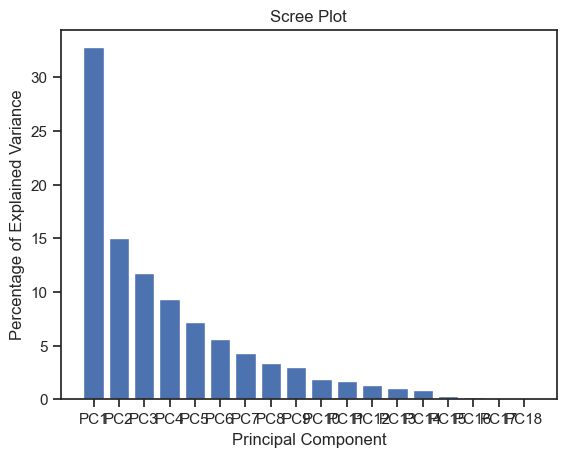

In [419]:
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


In [420]:
X_train.shape

(15854, 18)

In [421]:
X_test.shape

(5865, 18)

In [422]:
y_train.shape

(15854,)

# Random Forest

In [423]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro'),
    'roc_auc':make_scorer(roc_auc_score, average='macro')
}

# 20 Splits usando StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)

cv_results = cross_validate(model, X_train, y_train, cv=stratified_kfold, scoring=scoring)

# Loop para testar todas as métricas definidas
for metric, scores in cv_results.items():
    if metric.startswith('test_'):
        print(f"{metric[5:]}: {scores.mean() * 100:.2f}%")

KeyboardInterrupt: 

In [ ]:
# model = RandomForestClassifier()
# model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred, average='macro')

In [ ]:
# Imprima as métricas
print(f'Acurácia: {accuracy * 100:.2f}%')
print(f'Precisão: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1-score: {f1 * 100:.2f}%')
print(f'ROC AUC: {roc_auc * 100:.2f}%')

Acurácia: 84.28%
Precisão: 56.69%
Recall: 56.97%
F1-score: 56.82%
ROC AUC: 56.97%


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Imprime a matriz de confusão
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[4810  475]
 [ 447  133]]


In [ ]:
unique_values, counts = np.unique(y_pred, return_counts=True)
result_df = pd.DataFrame({'Valores Únicos': unique_values, 'Contagens': counts})
result_df = result_df.sort_values(by='Contagens', ascending=False)
print(result_df)

   Valores Únicos  Contagens
0               0       5257
1               1        608


# Hyperparameters


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [ ]:
hyperparameters = {
    'n_estimators': 168,
    'max_depth': 17,
    'min_samples_split': 4,
    'min_samples_leaf': 8,
    'max_features': 'log2',
    'bootstrap': False,
    'random_state': 42
    }

In [ ]:
model = RandomForestClassifier(**hyperparameters)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_train)
class_report = classification_report(y_train, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      7920
           1       0.97      0.99      0.98      7920

    accuracy                           0.98     15840
   macro avg       0.98      0.98      0.98     15840
weighted avg       0.98      0.98      0.98     15840



In [ ]:
auc_roc = roc_auc_score(y_train, y_pred)
print(auc_roc)

0.9827020202020201


In [ ]:
y_pred = model.predict(X_test)
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      5285
           1       0.19      0.28      0.23       580

    accuracy                           0.81      5865
   macro avg       0.56      0.58      0.56      5865
weighted avg       0.85      0.81      0.83      5865



In [ ]:
auc_roc = roc_auc_score(y_test, y_pred)
print(auc_roc)

0.5771408997488011


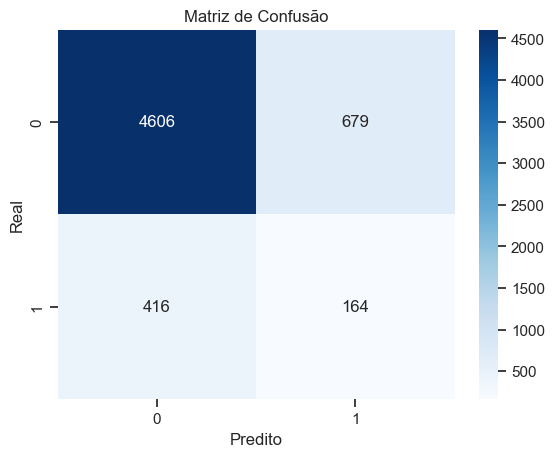

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

Validação cruzada - hyper


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Defina os hiperparâmetros que você deseja otimizar
hyperparameters = {
    'n_estimators': [168],
    'max_depth': [17],
    'min_samples_split': [4],
    'min_samples_leaf': [8],
    'max_features': ['log2'],
    'bootstrap': [False],
    'random_state': [42]
}

# Crie uma instância do modelo RandomForestClassifier
model = RandomForestClassifier()

# Crie uma instância do GridSearchCV para realizar a busca de hiperparâmetros
grid_search = RandomizedSearchCV(model, hyperparameters, cv=stratified_kfold, scoring='accuracy')

# Aplique a busca de hiperparâmetros nos dados de treinamento
grid_search.fit(X_train, y_train)

# Exiba os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros encontrados:", best_params)

# Obtenha o modelo com os melhores hiperparâmetros
best_model = grid_search.best_estimator_

# Realize a validação cruzada com o modelo otimizado usando os hiperparâmetros
cv_results = cross_val_score(best_model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

# Imprima a média da precisão obtida durante a validação cruzada
print("Precisão média durante a validação cruzada:", cv_results.mean() * 100)


c:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Melhores hiperparâmetros encontrados: {'random_state': 42, 'n_estimators': 168, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 'log2', 'max_depth': 17, 'bootstrap': False}
Precisão média durante a validação cruzada: 89.26136363636365


In [ ]:
best_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=17, max_features='log2',
                       min_samples_leaf=8, min_samples_split=4,
                       n_estimators=168, random_state=42)

In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_pred)

print("Precisão:", accuracy * 100)
print("Precisão (macro):", precision * 100)
print("Recall (macro):", recall * 100)
print("F1-score (macro):", f1 * 100)
print("ROC AUC:", roc_auc)


Precisão: 81.32992327365729
Precisão (macro): 55.5853887025203
Recall (macro): 57.71408997488011
F1-score (macro): 56.21302335925866
ROC AUC: 0.5771408997488011


# XGB Training
 

Now it's time to split the data into Independent and Dependent variables. Lets drop dates and id from the train dataset as we are going to the modelling part where we need only features.

In the features, Features activity_new, channel_sales and origin_up are the two categorical variables. Let's encode them.

In [ ]:
grid_hiper = {
    'objective': ['binary:logitraw'],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 500],
    'n_jobs': [-1, 1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
}

In [ ]:
# # Crie um objeto RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb.XGBClassifier(),
    param_distributions=grid_hiper,
    n_iter=10,  # Número de iterações de pesquisa aleatória
    cv=5,  # Número de dobras na validação cruzada
    n_jobs=-1,  # Use todos os núcleos da CPU para paralelizar
    random_state=42  # Defina uma semente aleatória para reprodutibilidade
)

In [ ]:
train_rs = random_search.fit(X_train, y_train)

In [ ]:
# # Visualize os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(train_rs.best_params_)

Validação cruzada - hyper

In [ ]:
model = xgb.XGBClassifier(objective='binary:logitraw',
                          learning_rate=0.1,
                          max_depth=4,
                          n_estimators=500,
                          n_jobs=1,
                          gamma=5,
                          colsample_bytree=0.9,
                          subsample=0.9)
result = model.fit(X_train,y_train)

In [ ]:
def evaluate(model_, X_test_, y_test_):
 prediction_test_ = model_.predict(X_test_)
 probability_test_ = model_.predict_proba(X_test_)[:, 1]  # get the probabilities for the positive class
 auc_roc = metrics.roc_auc_score(y_test_, probability_test_)
 confusion = metrics.confusion_matrix(y_test_, prediction_test_)
 results = pd.DataFrame({"Accuracy" : [metrics.accuracy_score(y_test_, prediction_test_)],
 "Precision" : [metrics.precision_score(y_test_, prediction_test_)],
 "Recall" : [metrics.recall_score(y_test_, prediction_test_)],
 "AUC-ROC": [auc_roc]
 })
 print("Confusion Matrix:")
 print(confusion)
 return results

In [ ]:
evaluate(model, X_train,y_train)



Confusion Matrix:
[[7587  333]
 [1155 6765]]


,Accuracy,Precision,Recall,AUC-ROC
0,0.906061,0.953085,0.854167,0.977689


In [ ]:
evaluate(model, X_test, y_test)



Confusion Matrix:
[[4699  586]
 [ 445  135]]


,Accuracy,Precision,Recall,AUC-ROC
0,0.824211,0.18724,0.232759,0.623179


In [ ]:
print(classification_report(y_test, y_pred))

# KNN Training

In [ ]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

In [ ]:
g_res.best_score_

In [ ]:
g_res.best_params_

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train, y_train)

In [ ]:
# Get predictions on the test set
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)


In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

In [ ]:
print(confusion_matrix(y_train, y_hat))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test, y_knn)).plot()
print()

In [ ]:
print(classification_report(y_test, y_knn))

In [ ]:
print(classification_report(y_train, y_hat))

In [ ]:
auc_roc = roc_auc_score(y_test, y_knn)
print(auc_roc)